In [94]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [95]:
env = BlackjackEnv()

In [129]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)
    V = defaultdict(float)
    i = 0
    while (i < num_episodes):
        states = []
        rewards = []
        states.append(env.reset())
        j = 0
        reward = 0
        done = 0
        while done != True:
            observation = env.step(policy(states[-1]))
            rewards.append(observation[1] * discount_factor ** j)
            done = observation[2]
            states.append(observation[0])
            j += 1

        for k, s in enumerate(states[:-1]):
            returns_count[s] += 1
            returns_sum[s] += sum(rewards[k:])
            V[s] =  returns_sum[s] / returns_count[s]
        i += 1
    return V    

In [130]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [131]:
mc_prediction(sample_policy, env, num_episodes=1)

defaultdict(float, {(17, 1, False): -1.0})

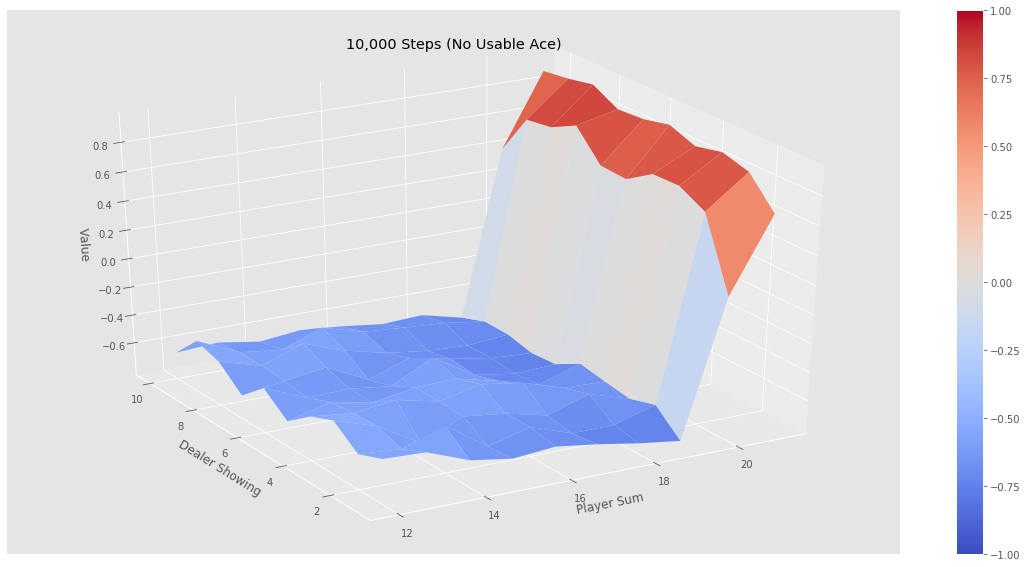

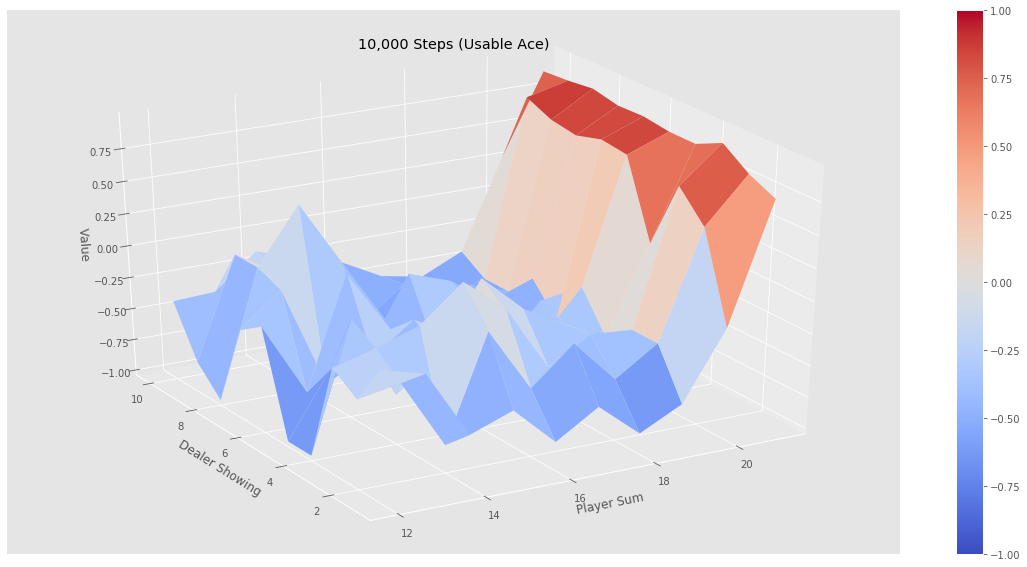

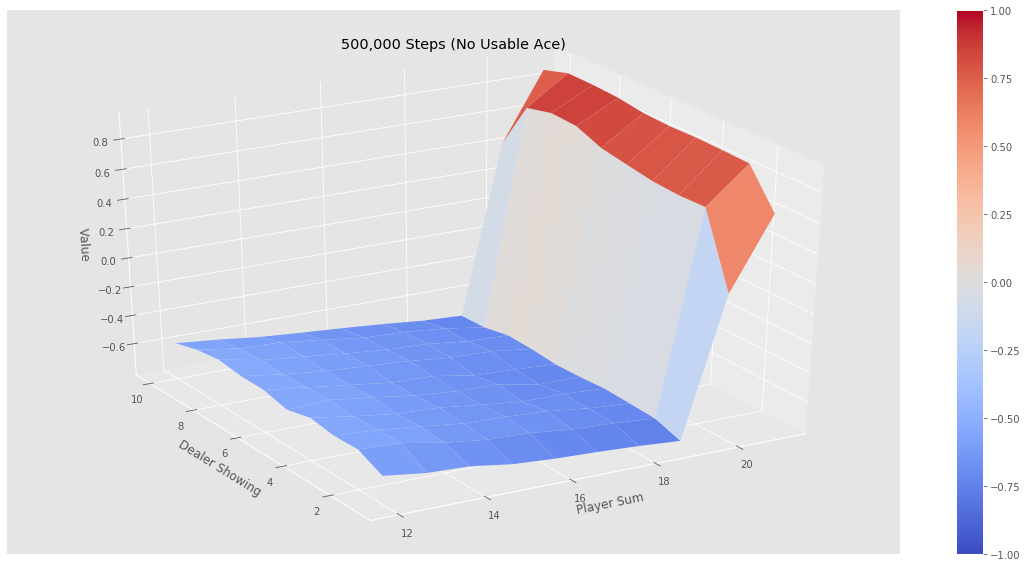

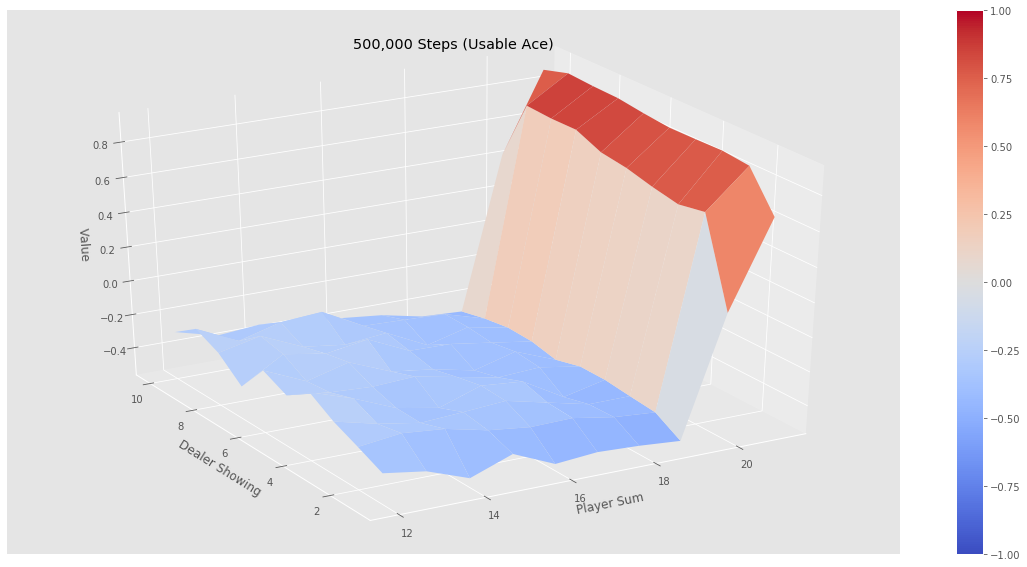

In [132]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

In [ ]:
.0
 Z